In [1]:
#Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing relevant Packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data observing  and cleaning 

In [3]:
data = pd.read_csv('Country-data.csv')

In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## <font color = blue>There are no null values</font>

In [6]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
#Converting percentage values to normal
data['exports'] = (data['exports']*data['gdpp'])/100

data['health'] = (data['health']*data['gdpp'])/100

data['imports'] = (data['imports']*data['gdpp'])/100

In [8]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


## Exploratory data analysis

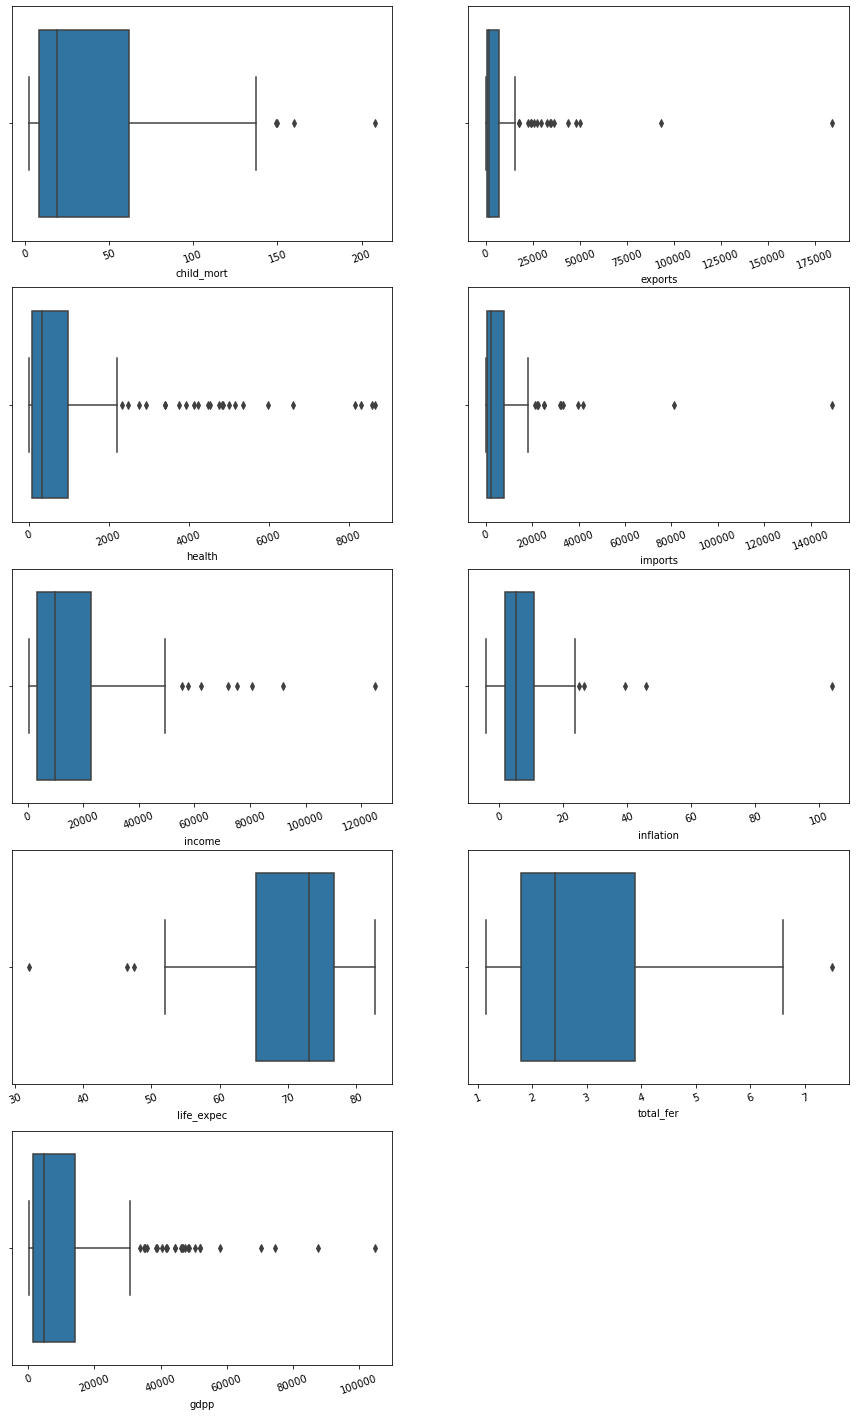

In [9]:
plt.figure(figsize=(15,25))
cols = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(cols): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xticks(rotation = 20)

### <font color = blue>As we can see that every column posses outliers</font>

In [10]:
#treating outliers
def fix_outlier(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [11]:
data = fix_outlier(data,'exports')

In [12]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
data = fix_outlier(data,'child_mort')
data = fix_outlier(data,'health')

In [14]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [15]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,4710.954895,680.241240,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,38.443293,5832.960967,804.768458,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,17524.290000,2324.546750,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [16]:
data = fix_outlier(data, 'imports')
data = fix_outlier(data, 'income')
data = fix_outlier(data, 'inflation')
data = fix_outlier(data, 'life_expec')
data = fix_outlier(data, 'total_fer')
data = fix_outlier(data, 'gdpp')

In [17]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,4710.954895,680.241240,4756.898995,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,5832.960967,804.768458,5690.687520,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,17524.290000,2324.546750,18338.677500,51967.500000,24.160000,82.800000,7.007500,33130.000000


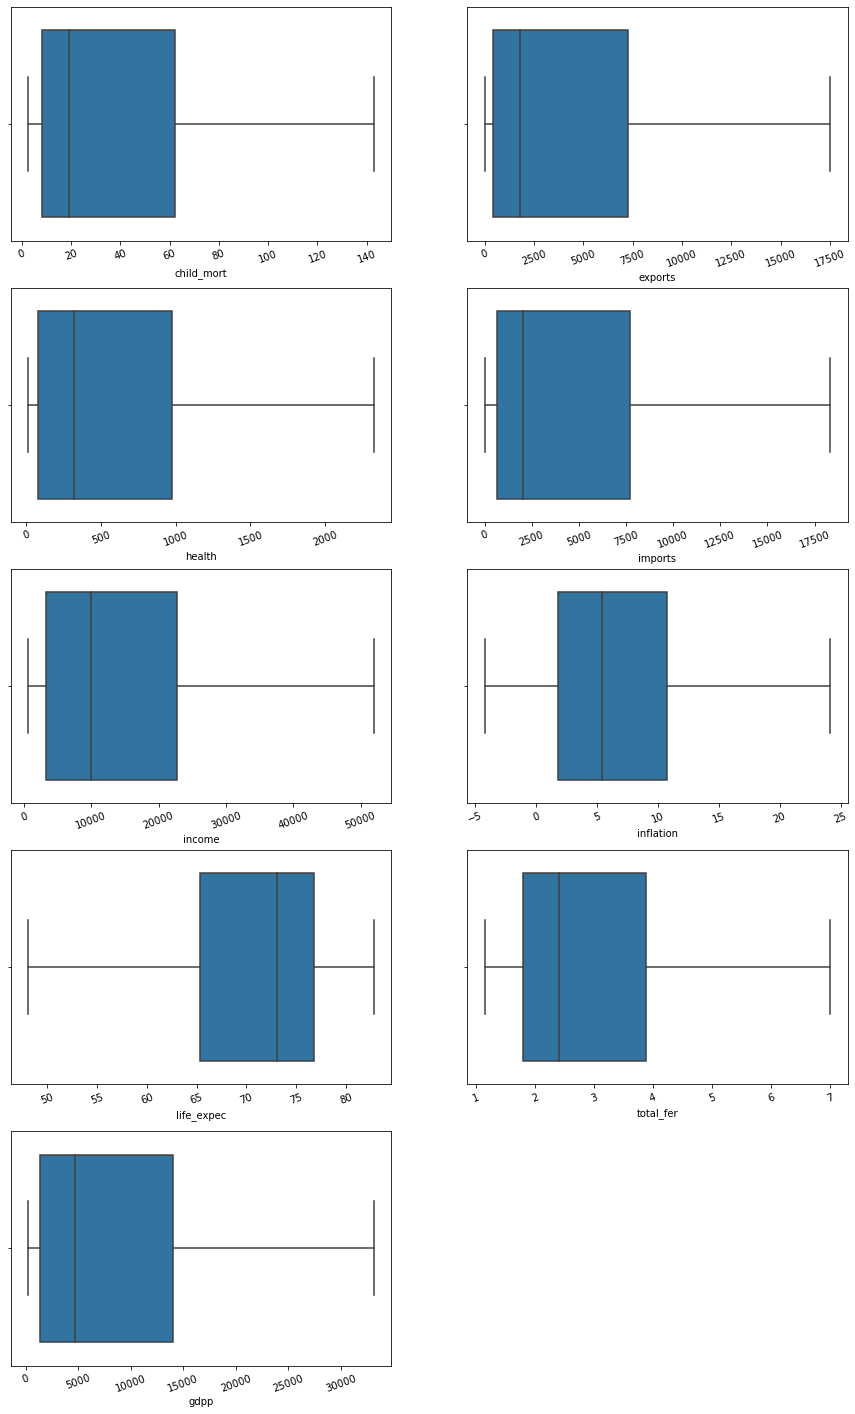

In [18]:
plt.figure(figsize=(15,25))
cols = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(cols): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xticks(rotation = 20)

### <font color = blue> Now it looks much better</font>

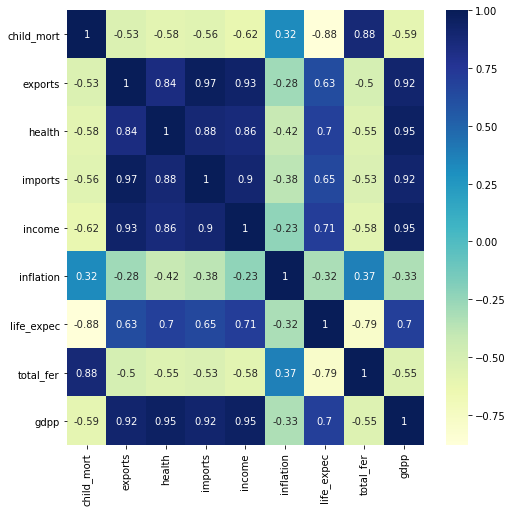

In [19]:
plt.figure(figsize = (8,8))  
sns.heatmap(data.corr(),annot = True,cmap="YlGnBu")
plt.show()

## clustering

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [22]:
def hopkins_test(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
hopkins_test(data.drop('country', axis = 1))

0.8503838936953941

## Data Scaling

In [24]:
data_1 = data.drop('country',axis=1)

In [25]:
standard_scaler = StandardScaler()
data_1 = standard_scaler.fit_transform(data_1)

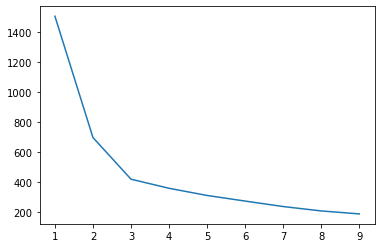

In [26]:
#K Means clustering
#elbow curve
list_1 = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(data_1)
    list_1.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(list_1)[0], pd.DataFrame(list_1)[1]);

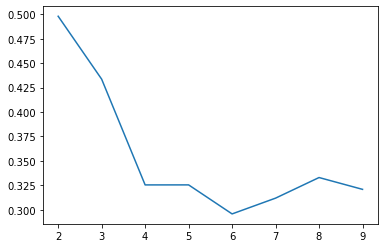

In [27]:
list_2 = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data_1)
    list_2.append([k, silhouette_score(data_1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(list_2)[0], pd.DataFrame(list_2)[1]);

In [28]:
clusters_range = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in clusters_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(data_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4980131625805177
For n_clusters=3, the silhouette score is 0.43360177139259876
For n_clusters=4, the silhouette score is 0.32436810285701795
For n_clusters=5, the silhouette score is 0.3278191932200708
For n_clusters=6, the silhouette score is 0.3453577266788587
For n_clusters=7, the silhouette score is 0.3156528792373735
For n_clusters=8, the silhouette score is 0.3248661801942315


In [29]:
#optimum k = 3

In [30]:
kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 100)
kmeans.fit(data_1)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [31]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [32]:
data_km = pd.concat([data, pd.Series(kmeans.labels_)], axis = 1)
data_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
data_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [33]:
data_km.nunique()

country       167
child_mort    136
exports       150
health        144
imports       156
income        149
inflation     152
life_expec    125
total_fer     138
gdpp          133
cluster_id      3
dtype: int64

In [34]:
data_km['cluster_id'].value_counts()

2    78
1    48
0    41
Name: cluster_id, dtype: int64

In [35]:
#Visualization

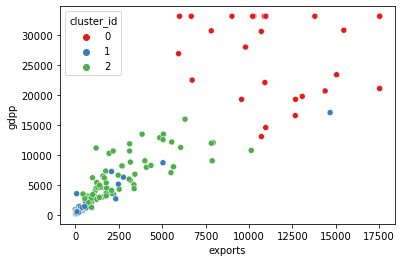

In [36]:
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='cluster_id', legend = 'full', data = data_km, palette='Set1')
plt.show()

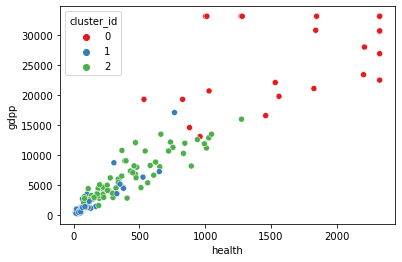

In [37]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_id', legend = 'full', data = data_km, palette='Set1')
plt.show()

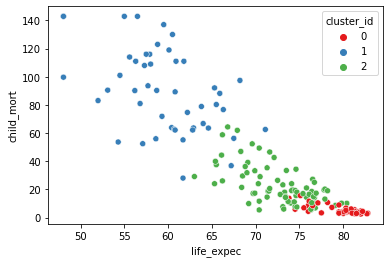

In [38]:
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_id', legend = 'full', data = data_km, palette='Set1')
plt.show()

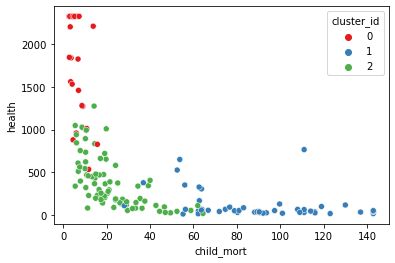

In [39]:
sns.scatterplot(x = 'child_mort', y = 'health', hue ='cluster_id', legend = 'full', data = data_km, palette='Set1')
plt.show()

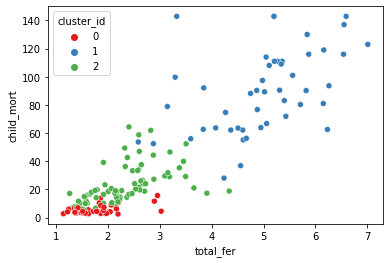

In [40]:
sns.scatterplot(x = 'total_fer', y = 'child_mort', hue ='cluster_id', legend = 'full', data = data_km, palette='Set1')
plt.show()

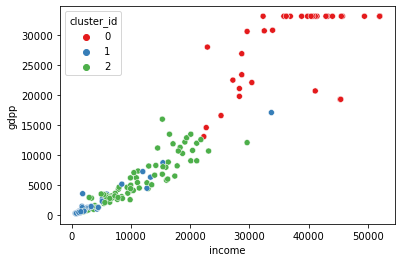

In [41]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = data_km, palette='Set1')
plt.show()

### Profiling

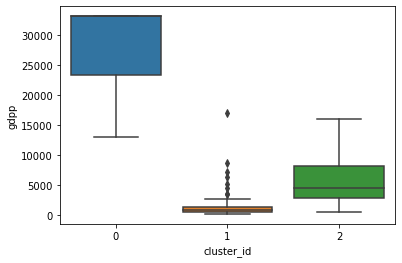

In [42]:
sns.boxplot(data= data_km,x = 'cluster_id',y='gdpp')
plt.show()

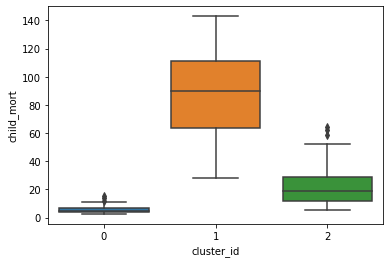

In [43]:
sns.boxplot(data=data_km,x = 'cluster_id',y='child_mort')
plt.show()

## Cluster id 0 has exceptionally low income and gdpp and extremely high child mortality rate this cluster will be our concentration.

In [44]:
data_km[data_km['cluster_id']==0]['country']

7                 Australia
8                   Austria
10                  Bahamas
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
51                  Estonia
53                  Finland
54                   France
58                  Germany
60                   Greece
67                  Hungary
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
115                    Oman
122                Portugal
123                   Qatar
128            Saudi Arabia
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                 

In [45]:
n_kmeans = data_km[data_km['cluster_id']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
n_kmeans = n_kmeans.reset_index().drop('index',axis=1)
n_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Saudi Arabia,15.7,9572.80,827.97000,6369.0000,45400.0,17.200,75.1,2.96,19300.0,0
1,Bahamas,13.8,9800.00,2209.20000,12236.0000,22900.0,-0.393,73.8,1.86,28000.0,0
2,Oman,11.7,12680.10,534.61000,7951.6000,45300.0,15.600,76.1,2.90,19300.0,0
3,Kuwait,10.8,17524.29,1012.55000,11704.0000,51967.5,11.200,78.2,2.21,33130.0,0
4,Brunei,10.5,17524.29,1002.52000,9884.0000,51967.5,16.700,77.1,1.84,33130.0,0
5,Qatar,9.0,17524.29,1272.43000,16731.4000,51967.5,6.980,79.5,2.07,33130.0,0
6,Bahrain,8.6,14386.50,1028.79000,10536.3000,41100.0,7.440,76.0,2.16,20700.0,0
7,United Arab Emirates,8.6,17524.29,1281.00000,18338.6775,51967.5,12.500,76.5,1.87,33130.0,0
8,United States,7.3,6001.60,2324.54675,7647.2000,49400.0,1.220,78.7,1.93,33130.0,0
9,Slovak Republic,7.0,12665.80,1459.14000,12914.8000,25200.0,0.485,75.5,1.43,16600.0,0


In [46]:
top_10 = n_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Saudi Arabia
1,Bahamas
2,Oman
3,Kuwait
4,Brunei
5,Qatar
6,Bahrain
7,United Arab Emirates
8,United States
9,Slovak Republic


## Top 10 countries obtained from K-Means Models are:
	Saudi Arabia
	Bahamas
	Oman
	Kuwait
	Brunei
	Qatar
	Bahrain
	United Arab Emirates
	United States
	Slovak Republic

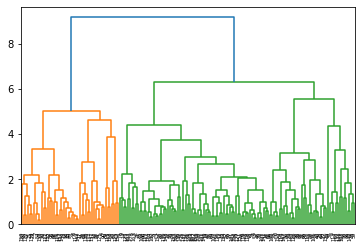

In [47]:
#Heirarichal Clustering
mergings = linkage(data_1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [48]:
c_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
c_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [49]:
data_hm = pd.concat([data, pd.Series(c_labels)], axis = 1)
data_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','c_labels']
data_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,c_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [50]:
data_hm.nunique()

country       167
child_mort    136
exports       150
health        144
imports       156
income        149
inflation     152
life_expec    125
total_fer     138
gdpp          133
c_labels        3
dtype: int64

In [51]:
data_hm['c_labels'].value_counts()

1    75
2    49
0    43
Name: c_labels, dtype: int64

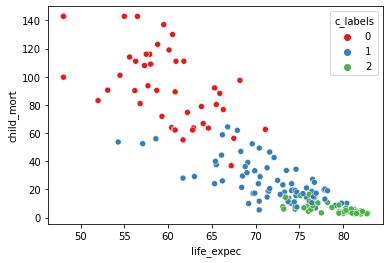

In [52]:
#Heirarichal Clusters Visulaisation
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='c_labels', legend = 'full', data = data_hm, palette='Set1')
plt.show()

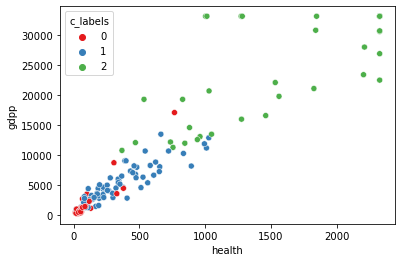

In [53]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='c_labels', legend = 'full', data = data_hm, palette='Set1')
plt.show()

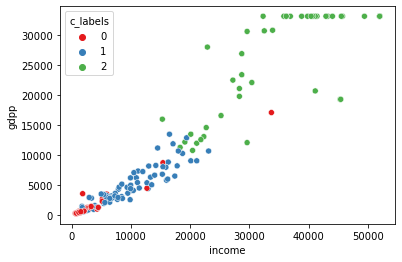

In [54]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='c_labels', legend = 'full', data = data_hm, palette='Set1')
plt.show()

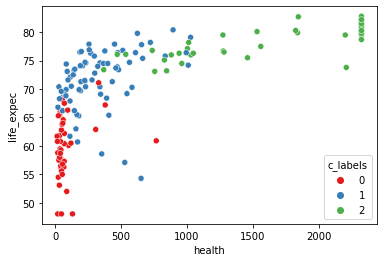

In [55]:
sns.scatterplot(x = 'health', y = 'life_expec', hue ='c_labels', legend = 'full', data = data_hm, palette='Set1')
plt.show()

In [56]:
data_hm[data_hm['c_labels']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113     

In [57]:
num_h = data_hm[data_hm['c_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
num_h = num_h.reset_index().drop('index',1)
num_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,c_labels
0,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0
1,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446.0,0
2,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662.0,0
3,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897.0,0
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330.0,0
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348.0,0
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530.0,0
8,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,0
9,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575.0,0


In [58]:
top_ten = num_h.iloc[:10]
top_ten['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


## Top 10 Countries obtained from Hierarchical Models are.

    Sierra Leone
	Central African Republic
	Haiti
	Chad
	Mali
	Nigeria
	Niger
	Angola
	Congo, Dem. Rep.
	Burkina Faso